# Training sessions

Here we want to show that mice can learn to press the lever (as expected from more than 80 years of lever press training in rodents). 

We will plot the number of rewards obtained during the first 6 days of training.

We need to load the log files and put this into a large Pandas DataFrame. 

In [3]:
import pandas as pd
import numpy as np
import os.path
import shutil
from autopipy.project import Project



In [4]:
projectName="autopi_behavior_2021"
dataPath="/adata/projects/autopi_behavior_2021"
dlcModelPath="/adata/models"
myProject = Project(name=projectName,dataPath=dataPath,dlcModelPath=dlcModelPath)

Project name: autopi_behavior_2021
dataPath: /adata/projects/autopi_behavior_2021
dlcModelPath: /adata/models


In [5]:
fn=myProject.dataPath+"/training_sessions"
print("Reading " + fn)
sessionNamesTraining = pd.read_csv(fn) # this will be a pandas dataframe
#sessionNamesTraining
myProject.createSessionList(sessionNameList=sessionNamesTraining.sessionName.to_list(), needVideos=False)
print("We have {} training sessions".format(len(myProject.sessionList)))

Reading /adata/projects/autopi_behavior_2021/training_sessions
We have 151 training sessions


Make sure that the needed files are there.

In [6]:
ses=myProject.sessionList[0]
print("Check if we have these files: {}".format(ses.requiredFileExts))

Check if we have these files: ['log', 'protocol']


In [7]:
for ses in myProject.sessionList :
    ses.checkSessionDirectory()

Get a DataFrame with all the log files and one with the protocol files

In [8]:
log = myProject.getLogData()
protocol = myProject.getProtocolData()
print("log length: {}, protocol length: {}".format(len(log),len(protocol)))

log length: 169431, protocol length: 151


This is how the log data frame look like.

In [9]:
log

,event,time,param,timeWS,session,subject,sessionDateTime
0,start,1.581003e+09,NaN,0.000000,mn3016-06022020-1629,mn3016,2020-02-06 16:29:00
1,magazineBeamBreak,1.581003e+09,NaN,18.744677,mn3016-06022020-1629,mn3016,2020-02-06 16:29:00
2,magazineBeamReceived,1.581003e+09,NaN,18.930677,mn3016-06022020-1629,mn3016,2020-02-06 16:29:00
3,magazineBeamBreak,1.581003e+09,NaN,19.695677,mn3016-06022020-1629,mn3016,2020-02-06 16:29:00
4,magazineBeamReceived,1.581003e+09,NaN,19.879677,mn3016-06022020-1629,mn3016,2020-02-06 16:29:00
...,...,...,...,...,...,...,...
1335,magazineBeamBreak,1.590932e+09,NaN,1773.857026,mn633-31052020-1309,mn633,2020-05-31 13:09:00
1336,magazineBeamReceived,1.590932e+09,NaN,1774.526026,mn633-31052020-1309,mn633,2020-05-31 13:09:00
1337,magazineBeamBreak,1.590932e+09,NaN,1798.139047,mn633-31052020-1309,mn633,2020-05-31 13:09:00
1338,magazineBeamReceived,1.590932e+09,NaN,1798.174047,mn633-31052020-1309,mn633,2020-05-31 13:09:00


Save these two datasets so we can use them anywhere.

In [10]:
# save the DataFram as csv file
fn = myProject.dataPath+"/results/logTrainingDF.csv"
log.to_csv(fn)
# save the DataFram as csv file
fn = myProject.dataPath+"/results/protocolTrainingDF.csv"
protocol.to_csv(fn)

We can load the files from file

In [11]:
fn = myProject.dataPath+"/results/logTrainingDF.csv"
log = pd.read_csv(fn)
# save the DataFram as csv file
fn = myProject.dataPath+"/results/protocolTrainingDF.csv"
protocol = pd.read_csv(fn)
print("log length: {}, protocol length: {}".format(len(log),len(protocol)))

log length: 169431, protocol length: 151


## Number of mice included

How many mice were included in this analysis?

In [20]:
print("Number of mice : {}".format(log["subject"].nunique()))

Number of mice : 20


## Learning the lever response

We just want to show that mice learn to press the lever over 6 days.

We first need to select the session in which we were doing the lever training.

Then we need to label each session according to its rank for each mouse.

In [21]:
leverTrainingSessions = protocol["session"][protocol["script"] == "autopi_lever_training.py"]

In [23]:
logLever = log[log["session"].isin(leverTrainingSessions)]
print("Number of mice : {}".format(logLever["subject"].nunique()))
print("Number of sessions : {}".format(logLever["session"].nunique()))

Number of mice : 20
Number of sessions : 137


Get the rank of each session for each mouse. We want to have a number from 1 to 6 for each session.

In [24]:
logLever["sessionDateTime"] =  pd.to_datetime(logLever["sessionDateTime"]) # somehow needed
logLever["day"] = logLever["sessionDateTime"].groupby(logLever["subject"]).rank(method="dense")
logLever

,Unnamed: 0,event,time,param,timeWS,session,subject,sessionDateTime,day
0,0,start,1.581003e+09,NaN,0.000000,mn3016-06022020-1629,mn3016,2020-02-06 16:29:00,1.0
1,1,magazineBeamBreak,1.581003e+09,NaN,18.744677,mn3016-06022020-1629,mn3016,2020-02-06 16:29:00,1.0
2,2,magazineBeamReceived,1.581003e+09,NaN,18.930677,mn3016-06022020-1629,mn3016,2020-02-06 16:29:00,1.0
3,3,magazineBeamBreak,1.581003e+09,NaN,19.695677,mn3016-06022020-1629,mn3016,2020-02-06 16:29:00,1.0
4,4,magazineBeamReceived,1.581003e+09,NaN,19.879677,mn3016-06022020-1629,mn3016,2020-02-06 16:29:00,1.0
...,...,...,...,...,...,...,...,...,...
169426,1335,magazineBeamBreak,1.590932e+09,NaN,1773.857026,mn633-31052020-1309,mn633,2020-05-31 13:09:00,3.0
169427,1336,magazineBeamReceived,1.590932e+09,NaN,1774.526026,mn633-31052020-1309,mn633,2020-05-31 13:09:00,3.0
169428,1337,magazineBeamBreak,1.590932e+09,NaN,1798.139047,mn633-31052020-1309,mn633,2020-05-31 13:09:00,3.0
169429,1338,magazineBeamReceived,1.590932e+09,NaN,1798.174047,mn633-31052020-1309,mn633,2020-05-31 13:09:00,3.0


## Session summary statistics

Now we want to get summary statistics for each day-mouse combination. 
This will be stored as a new pandas data frame.

We write a function that returns a dataframe with the variables we want per day-mouse, then apply it to a groupby dataframe.

In [28]:
def mySummary(df):
    duration=df["time"].max() - df["time"].min()
    leverPresses=np.sum((df["event"]=="lever_press") |(df["event"]=="leverPress"))
    rewards=np.sum(df["event"]=="pellet_delivery_report")
    leverPressesPerReward = leverPresses/rewards
    rewardRate = rewards/duration*60 # per minutes
    return pd.DataFrame({"duration": [duration],
                        "leverPresses": [leverPresses],
                        "rewards": [rewards],
                        "leverPressesPerReward": [leverPressesPerReward],
                        "rewardRate": [rewardRate]})

sDf = logLever.groupby(["subject","day"]).apply(mySummary).reset_index()

# only keep the first 6 days for the figure
sDf = sDf[sDf.day < 7 ]


In [29]:
sDf

,subject,day,level_2,duration,leverPresses,rewards,leverPressesPerReward,rewardRate
0,mn3016,1.0,0,1802.376751,23,13,1.769231,0.432762
1,mn3016,2.0,0,1802.524856,50,22,2.272727,0.732306
2,mn3016,3.0,0,1802.443332,55,31,1.774194,1.031933
3,mn3016,4.0,0,1802.407652,88,76,1.157895,2.529949
4,mn3016,5.0,0,1026.867459,132,100,1.320000,5.843013
...,...,...,...,...,...,...,...,...
132,mn633,1.0,0,1802.560159,32,22,1.454545,0.732292
133,mn633,2.0,0,1802.510743,35,25,1.400000,0.832173
134,mn633,3.0,0,1802.479396,122,61,2.000000,2.030536
135,mn633,4.0,0,1802.477537,118,76,1.552632,2.529851


In [33]:
print("number of mice: {}".format(sDf["subject"].nunique()))
print("number of sessions: {}".format(len(sDf["subject"])))

number of mice: 20
number of sessions: 117


Now it is time to plot the data. 

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.gridspec as gridspec
import seaborn as sns
from scipy import stats
plt.style.use("seaborn")

Saving to /adata/projects/autopi_behavior_2021/results/introduction_01.png



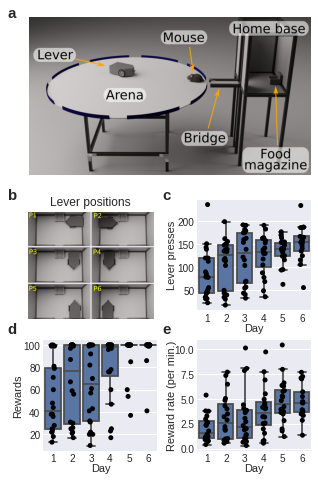

In [76]:
image1file = "/adata/projects/autopi_behavior_2021/results/images/setupLabels.png"
image2file = "/adata/projects/autopi_behavior_2021/results/images/leverPosition.png"

## to get consistent figure, we will give 

col=2
row=3
sizePerPlot=2.4
fig = plt.figure(figsize=(col*sizePerPlot,row*sizePerPlot))
gs = gridspec.GridSpec(row,col,wspace=0.35, hspace=0.27)
fig.tight_layout()

#############################################
#############################################
#a
ax = plt.subplot(gs[0, 0:2], ) # get a subplot
img=mpimg.imread(image1file)
img.shape
ax.imshow(img)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
pos1 = ax.get_position() # get the original position 
pos2 = [pos1.x0 - 0.145, pos1.y0-0.01,  pos1.width * 1.43, pos1.height * 1.43] 
ax.set_position(pos2) # set a new position
ax.text(0.02,0.96, 'a', style='normal',fontsize=15, weight="bold", transform=plt.gcf().transFigure)

##########################################
##########################################
#b
ax = plt.subplot(gs[1, 0], ) # get a subplot
img=mpimg.imread(image2file)
img.shape
ax.imshow(img)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
pos1 = ax.get_position() # get the original position 
pos2 = [pos1.x0 - 0.045, pos1.y0-0.03,  pos1.width * 1.1, pos1.height * 1.1] 
ax.set_position(pos2) # set a new position
ax.set_title("Lever positions")
ax.text(0.02,0.61, 'b', style='normal',fontsize=15, weight="bold", transform=plt.gcf().transFigure)

#############################################
# c
ax = plt.subplot(gs[1,1], ) # get a subplot
sns.boxplot(y='leverPresses', x='day', 
                 data=sDf,showfliers=False,color=sns.color_palette()[0] )
sns.stripplot(y='leverPresses', x='day', 
                 data=sDf,color="black")
plt.xticks(range(6),labels=["1","2","3","4","5","6"])
plt.xlabel("Day")
plt.ylabel("Lever presses")
ax.text(0.47,0.61, 'c', style='normal',fontsize=15, weight="bold", transform=plt.gcf().transFigure)
ax.yaxis.set_label_coords(-0.18,0.5)
ax.xaxis.set_label_coords(0.5, -0.12)
ax.tick_params(axis='both', which='major', pad=3)


#############################################
# d
ax = plt.subplot(gs[2,0], ) # get a subplot
sns.boxplot(y='rewards', x='day', 
                 data=sDf,showfliers=False,color=sns.color_palette()[0] )
sns.stripplot(y='rewards', x='day', 
                 data=sDf,color="black")
plt.xticks(range(6),labels=["1","2","3","4","5","6"])
plt.xlabel("Day")
plt.ylabel("Rewards")
ax.text(0.02,0.35, 'd', style='normal',fontsize=15, weight="bold", transform=plt.gcf().transFigure)
ax.xaxis.set_label_coords(0.5, -0.12)
ax.yaxis.set_label_coords(-0.18,0.5)
ax.tick_params(axis='both', which='major', pad=3)


#############################################
# e
ax = plt.subplot(gs[2,1], ) # get a subplot
sns.boxplot(y='rewardRate', x='day', 
                 data=sDf,showfliers=False,color=sns.color_palette()[0] )
sns.stripplot(y='rewardRate', x='day', 
                 data=sDf,color="black")
plt.xticks(range(6),labels=["1","2","3","4","5","6"])
plt.xlabel("Day")
plt.ylabel("Reward rate (per min.)")
ax.text(0.47,0.35, 'e', style='normal',fontsize=15, weight="bold", transform=plt.gcf().transFigure)
ax.xaxis.set_label_coords(0.5, -0.12)
ax.yaxis.set_label_coords(-0.18,0.5)
ax.tick_params(axis='both', which='major', pad=3)

fileName = myProject.dataPath+"/results/introduction_01.png"
print("Saving to " + fileName)
print("")
plt.savefig(fileName,bbox_inches = "tight",dpi=300)
plt.show()

Although it is rather obvious from the figure, we still have to provide statistical tests showing the mice learned the lever press response. We could compare day 1 to day 6 for the data shown in **c**, **d** and **e**. 

In [89]:
print("Comparison Day 1 vs 6")
for var in ["leverPresses","rewards","rewardRate"]:
    print(var)
    x = sDf[sDf["day"]==1][var]
    y = sDf[sDf["day"]==6][var]
   # print("Day 1")
   # print(x.describe())
   # print("Day 6")
   # print(y.describe())
    stat,p_value = stats.mannwhitneyu(x=x, y = y)
    print("stat: {}, p_value: {}".format(stat,p_value))


Comparison Day 1 vs 6
leverPresses
stat: 47.5, p_value: 9.99327857709995e-05
rewards
stat: 33.0, p_value: 8.2136851351353e-06
rewardRate
stat: 32.0, p_value: 1.3919258522818909e-05
